# Storytelling Data Visualization Lab

In this lab you'll use a dataset called `housing_prices.csv` which contains the sales data of houses. The dataset and descriptions of the columns are available from [Kaggle](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data). For your convenience, you can review the descriptions of the data columns from [here](data-description.txt).

Pretend you are a data analyst at an investment company where the board decided to make investments in real estates. Your boss asked you to analyze this housing sales dataset and present to the investment managers on **what features of houses are strong indicators of the final sale price**. You need to present your findings in intuitive ways so that the investment managers understand where your conclusions come from.

#### You will use the appropriate data visualization graphs to tell your stories.

## Challenge 1 - Understanding the Dataset

After receiving the data and clarifying your objectives with your boss, you will first try to understand the dataset. This allows you to decide how you will start your research in the next step.

#### First, import the basic libraries and the dataset.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('housing_prices.csv')

#### As a routine before analyzing a dataset, print the first few rows of the dataset

In [2]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


You find the dataset has 81 columns which are a lot. 

#### Since the column `Id` is meaningless in our data visualization work, let's drop it

In [3]:
# your code here
df = df.drop(columns = ['Id'])
df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


You care about missing values. If a column has too many missing values, it is not reliable to use it to predict sales price.

#### In the cell below, calculate the percentage of missing values for each column. 

Make a table containing the column name and the percentage of missing values. Print the columns where more than 20% of values are missing. An example of your output looks like:

![Missing Values](missing-values.png)

[This reference](https://stackoverflow.com/questions/51070985/find-out-the-percentage-of-missing-values-in-each-column-in-the-given-dataset) can help you make the missing values table.

In [4]:
# your code here
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': percent_missing})
missing_value_df.sort_values('percent_missing', inplace=True, ascending = False)
missing_value_df_greater_20 = missing_value_df.loc[missing_value_df['percent_missing'] > 20]
missing_value_df_greater_20

,column_name,percent_missing
PoolQC,PoolQC,99.520548
MiscFeature,MiscFeature,96.301370
Alley,Alley,93.767123
Fence,Fence,80.753425
FireplaceQu,FireplaceQu,47.260274


#### Drop the columns you find that have more than 20% missing values.

After dropping, check the shape of your dataframes. You should have 75 columns now.

In [5]:
# your code here
df = df.drop(columns = missing_value_df_greater_20.column_name )
df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,112,0,0,0,0,4,2010,WD,Normal,142125


Since you're asked to analyze sale prices, first let's see if the sale prices (column `SalePrice`) has a normal distribution. This is important because normally distributed data can be better represented with mathematical models.

#### In the cell below, use the propriate graph to visualize the shape of distribution of the sale prices. Then explain what you find from the graph about data distribution.

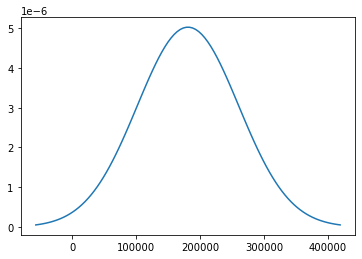

In [6]:
# your code here
import scipy.stats as stats
import math

mu = df['SalePrice'].mean()
sigma = df['SalePrice'].std()
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.plot(x, stats.norm.pdf(x, mu, sigma))
plt.show()

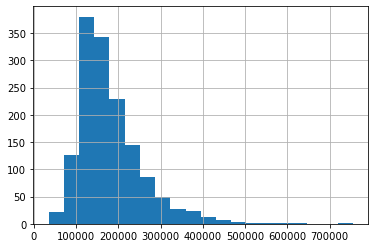

In [7]:
df['SalePrice'].hist(bins = 20)

In [8]:
# your comment here
"""From the histogram I can see the graph is positively skewed to the right. There is an outlier after 700000.
The graph is said to be right skewed when mean value is greater than the median value."""

'From the histogram I can see the graph is positively skewed to the right. There is an outlier after 700000.\nThe graph is said to be right skewed when mean value is greater than the median value.'

## Bonus Challenge 1 - Adjust Data Distribution

If you used the correct method in the previous step, you should have found the data distribution is skewed to the left. In order to improve your data visualization in the next steps, you can opt to adjust the `SalePrice` column by applying a mathematical function to the values. The goal is to produce a bell-shape normal distribution after applying the mathematical function to the sale price.

*This technique is optional in data visualization but you'll find it useful in your future machine learning analysis.*

#### In the cell below, adjust the `SalePrice` column so that the data are normally distributed.

Try applying various mathematical functions such as square root, power, and log to the `SalePrice` column. Visualize the distribution of the adjusted data until you find a function that makes the data normally distributed. **Create a new column called `SalePriceAdjusted` to store the adjusted sale price.**

[This reference](https://trainingdatascience.com/workshops/histograms-and-skewed-data/) shows you examples on how to adjust skewed data.

'Using Squareroot transformation its almost a normal distribution but still there is a slope to the left.'

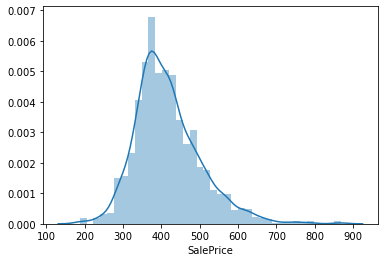

In [9]:
# your code here
# Using Square Root Transformation
sale_price_adjusted_sqrt = df.SalePrice**(.5)
sale_price_adjusted_sqrt 
sns.distplot(sale_price_adjusted_sqrt )
"""Using Squareroot transformation its almost a normal distribution but still there is a slope to the left."""

'Using log function we can see saleprice is giving a normal distribution.'

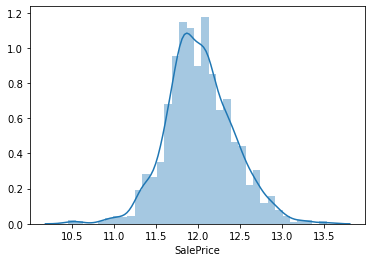

In [10]:
# Log Transformation
sale_price_adjusted_log = np.log(df.SalePrice)
sns.distplot(sale_price_adjusted_log)
"""Using log function we can see saleprice is giving a normal distribution."""

'Its still right skewed using reciprocal transformation.'

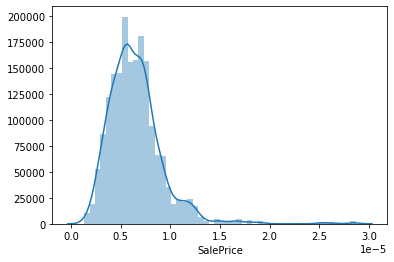

In [11]:
# Reciprocal Transformation
sale_price_adjusted_reci = 1 / df.SalePrice
sns.distplot(sale_price_adjusted_reci)
"""Its still right skewed using reciprocal transformation."""

## Challenge 2 - Exploring Data with Common Sense

Now that we have a general understanding of the dataset, we start exploring the data with common sense by means of data visualization. Yes, in data analysis and even machine learning you are often required to use common sense. You use your common sense to make a scientific guess (i.e. hypothesis) then use data analytics methods to test your hypothesis.

This dataset is about housing sales. According to common sense, housing prices depend on the following factors:

* **Size of the house** (`GrLivArea`, `LotArea`, and `GarageArea`).

* **Number of rooms** (`BedroomAbvGr`, `KitchenAbvGr`, `FullBath`, `HalfBath`, `BsmtFullBath`, `BsmtHalfBath`).

* **How long the house has been built or remodeled** (`YearBuilt` and `YearRemodAdd`).

* **Neighborhood of the house** (`Neighborhood`).

#### In this challenge, use the appropriate graph type to visualize the relationships between `SalePrice` (or `SalePriceAdjusted`) and the fields above. 

Note that:

* Transform certain columns in order to visualize the data properly based on common sense. For example:
    * Visualizing how the number of half bathrooms affected the sale price probably does not make sense. You can create a new column to calculate the total number of bathrooms/rooms then visualize with the calculated number.
    * `YearBuilt` and `YearRemodAdd` are year numbers not the age of the house. You can create two new columns for how long the house has been built or remodeled then visualize with the calculated columns.
* Make comments to explain your thinking process.

In [12]:
# your code here
# Adding SalePriceAdjusted column to the dataframe.
df['SalePriceAdjusted'] = sale_price_adjusted_log
df
# add cells as needed

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,SalePriceAdjusted
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,2,2008,WD,Normal,208500,12.247694
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,5,2007,WD,Normal,181500,12.109011
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,9,2008,WD,Normal,223500,12.317167
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,2,2006,WD,Abnorml,140000,11.849398
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,12,2008,WD,Normal,250000,12.429216
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,8,2007,WD,Normal,175000,12.072541
1456,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,2,2010,WD,Normal,210000,12.254863
1457,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,2500,5,2010,WD,Normal,266500,12.493130
1458,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,4,2010,WD,Normal,142125,11.864462


In [13]:
# Creating a new column for size of the house
df['SizeOfHouse'] = df['GrLivArea'] + df['LotArea'] + df['GarageArea']
df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,SalePriceAdjusted,SizeOfHouse
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,2,2008,WD,Normal,208500,12.247694,10708
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,5,2007,WD,Normal,181500,12.109011,11322
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,9,2008,WD,Normal,223500,12.317167,13644
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,0,2,2006,WD,Abnorml,140000,11.849398,11909
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,12,2008,WD,Normal,250000,12.429216,17294
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,8,2007,WD,Normal,175000,12.072541,10024
1456,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,2,2010,WD,Normal,210000,12.254863,15748
1457,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,2500,5,2010,WD,Normal,266500,12.493130,11634
1458,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,4,2010,WD,Normal,142125,11.864462,11035


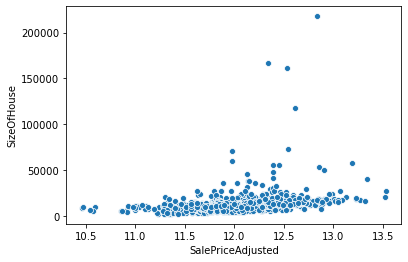

In [14]:
# Used to a scatterplot to find the relation between them.
sns.scatterplot(x = df['SalePriceAdjusted'], y = df['SizeOfHouse'])


In [15]:
# We can see its a positively correlated but not too much, if the size of the house increase the sale price is also
# increasing but there are some outlier after 200000.
df['SalePriceAdjusted'].corr(df['SizeOfHouse'])

0.30221991519338726

In [16]:
# df['HalfBath']
df['BsmtHalfBath']

0       0
1       1
2       0
3       0
4       0
       ..
1455    0
1456    0
1457    0
1458    0
1459    0
Name: BsmtHalfBath, Length: 1460, dtype: int64

In [17]:
df['FullBath']

0       2
1       2
2       2
3       1
4       2
       ..
1455    2
1456    2
1457    2
1458    1
1459    1
Name: FullBath, Length: 1460, dtype: int64

In [18]:
# Total Number of bathrooms 
df['NumberOfBathrooms'] = df['FullBath'] + df['HalfBath']/2 + df['BsmtFullBath'] + df['BsmtHalfBath']/2
df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,SalePriceAdjusted,SizeOfHouse,NumberOfBathrooms
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,2,2008,WD,Normal,208500,12.247694,10708,3.5
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,5,2007,WD,Normal,181500,12.109011,11322,2.5
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,9,2008,WD,Normal,223500,12.317167,13644,3.5
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,2,2006,WD,Abnorml,140000,11.849398,11909,2.0
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,12,2008,WD,Normal,250000,12.429216,17294,3.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,8,2007,WD,Normal,175000,12.072541,10024,2.5
1456,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,2,2010,WD,Normal,210000,12.254863,15748,3.0
1457,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,2500,5,2010,WD,Normal,266500,12.493130,11634,2.0
1458,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,4,2010,WD,Normal,142125,11.864462,11035,2.0


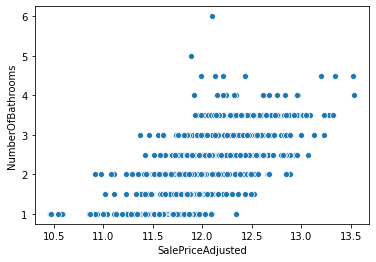

In [19]:
sns.scatterplot(x = df['SalePriceAdjusted'], y = df['NumberOfBathrooms'])

In [20]:
# There is a positive correlation between them if the number of bathrooms increase price increases.
df['SalePriceAdjusted'].corr(df['NumberOfBathrooms'])

0.6730105940434346

In [21]:
# Creating a column for number of rooms:
df['NumberOfRooms'] = df['BedroomAbvGr'] + df['KitchenAbvGr'] + df['NumberOfBathrooms']
df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,SalePriceAdjusted,SizeOfHouse,NumberOfBathrooms,NumberOfRooms
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,2,2008,WD,Normal,208500,12.247694,10708,3.5,7.5
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,5,2007,WD,Normal,181500,12.109011,11322,2.5,6.5
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,9,2008,WD,Normal,223500,12.317167,13644,3.5,7.5
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,2,2006,WD,Abnorml,140000,11.849398,11909,2.0,6.0
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,12,2008,WD,Normal,250000,12.429216,17294,3.5,8.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,8,2007,WD,Normal,175000,12.072541,10024,2.5,6.5
1456,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,2,2010,WD,Normal,210000,12.254863,15748,3.0,7.0
1457,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,2500,5,2010,WD,Normal,266500,12.493130,11634,2.0,7.0
1458,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,4,2010,WD,Normal,142125,11.864462,11035,2.0,5.0


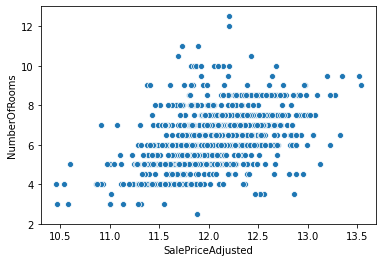

In [22]:
sns.scatterplot(x = df['SalePriceAdjusted'], y = df['NumberOfRooms'])

In [23]:
# There is a positive correlation between them, if the number of rooms increase price increases.
df['SalePriceAdjusted'].corr(df['NumberOfRooms'])

0.5087927378232505

In [24]:
df['YearBuilt']

0       2003
1       1976
2       2001
3       1915
4       2000
        ... 
1455    1999
1456    1978
1457    1941
1458    1950
1459    1965
Name: YearBuilt, Length: 1460, dtype: int64

In [25]:
import datetime
now = datetime.datetime.now().year
# print(now)
df['AgeOfBuilt'] = now - df['YearBuilt']
df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,MoSold,YrSold,SaleType,SaleCondition,SalePrice,SalePriceAdjusted,SizeOfHouse,NumberOfBathrooms,NumberOfRooms,AgeOfBuilt
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,2,2008,WD,Normal,208500,12.247694,10708,3.5,7.5,17
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,5,2007,WD,Normal,181500,12.109011,11322,2.5,6.5,44
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,9,2008,WD,Normal,223500,12.317167,13644,3.5,7.5,19
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,2,2006,WD,Abnorml,140000,11.849398,11909,2.0,6.0,105
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,12,2008,WD,Normal,250000,12.429216,17294,3.5,8.5,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,8,2007,WD,Normal,175000,12.072541,10024,2.5,6.5,21
1456,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,2,2010,WD,Normal,210000,12.254863,15748,3.0,7.0,42
1457,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,5,2010,WD,Normal,266500,12.493130,11634,2.0,7.0,79
1458,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,4,2010,WD,Normal,142125,11.864462,11035,2.0,5.0,70


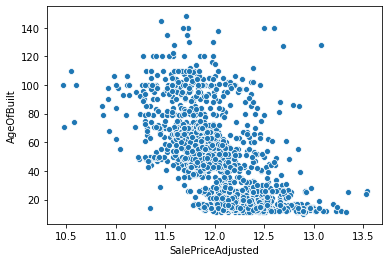

In [26]:
sns.scatterplot(x = df['SalePriceAdjusted'], y = df['AgeOfBuilt'])

In [27]:
# As from the graph we can see if the age of built increases the sale price decreases, so they are negatively 
# correlated.
df['SalePriceAdjusted'].corr(df['AgeOfBuilt'])

-0.5865702403842266

In [28]:
now = datetime.datetime.now().year
# print(now)
df['AgeOfRemodeled'] = now - df['YearRemodAdd']
df


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,YrSold,SaleType,SaleCondition,SalePrice,SalePriceAdjusted,SizeOfHouse,NumberOfBathrooms,NumberOfRooms,AgeOfBuilt,AgeOfRemodeled
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,2008,WD,Normal,208500,12.247694,10708,3.5,7.5,17,17
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,2007,WD,Normal,181500,12.109011,11322,2.5,6.5,44,44
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,2008,WD,Normal,223500,12.317167,13644,3.5,7.5,19,18
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,2006,WD,Abnorml,140000,11.849398,11909,2.0,6.0,105,50
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,2008,WD,Normal,250000,12.429216,17294,3.5,8.5,20,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,2007,WD,Normal,175000,12.072541,10024,2.5,6.5,21,20
1456,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,2010,WD,Normal,210000,12.254863,15748,3.0,7.0,42,32
1457,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,2010,WD,Normal,266500,12.493130,11634,2.0,7.0,79,14
1458,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,2010,WD,Normal,142125,11.864462,11035,2.0,5.0,70,24


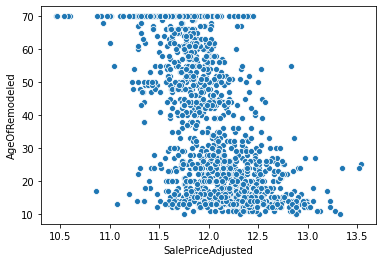

In [29]:
sns.scatterplot(x = df['SalePriceAdjusted'], y = df['AgeOfRemodeled'])

In [30]:
# Same as age of built, if the age of remodelling increases the sale price decreases, No body wants to buy the house 
# for more price if its old.
df['SalePriceAdjusted'].corr(df['AgeOfRemodeled'])

-0.5656078325911793

## Bonus Challenge 2 - Exploring Data with Correlation Heatmap

Now you have explored data visualizations with certain fields based on common sense. In the dataset there are many other fields that you are not sure whether they are important factors for the sale price. What is the best way to explore those fields without investigating them individually?

Making scatter matrix is not an option here because there are too many fields which makes it extremely time consuming to create scatter matrix. One option you have is to create a heatmap. Heatmaps are much less expensive to create than scatter matrixes. You can use heatmaps to visualize the pairwise correlations between each two variables.

Here is a [reference](https://seaborn.pydata.org/examples/many_pairwise_correlations.html) you can use to learn how to creat the pairwise correlation heatmap. Your heatmap should look like below:

![Corr Heatmap](heatmap.png)

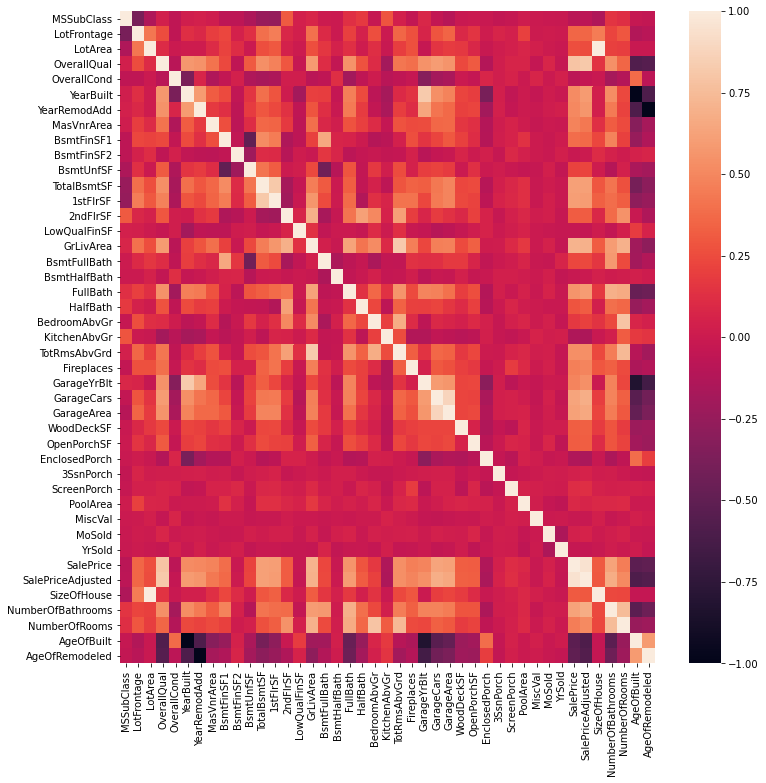

In [31]:
# your code here
# AS they are closely clustered
plt.figure(figsize=(12,12))
corr = df.corr()
sns.heatmap(corr)

In [32]:
# I am using the regular correlation to get a clear idea of it.
df.corr()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,MiscVal,MoSold,YrSold,SalePrice,SalePriceAdjusted,SizeOfHouse,NumberOfBathrooms,NumberOfRooms,AgeOfBuilt,AgeOfRemodeled
MSSubClass,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,-0.065649,...,-0.007683,-0.013585,-0.021407,-0.084284,-0.073959,-0.135293,0.151048,0.123332,-0.027850,-0.040581
LotFrontage,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,0.049900,...,0.003368,0.011200,0.007450,0.351799,0.355878,0.449097,0.220092,0.293883,-0.123349,-0.088866
LotArea,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,0.111170,...,0.038068,0.001205,-0.014261,0.263843,0.257320,0.998087,0.204764,0.194283,-0.014228,-0.013788
OverallQual,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,-0.059119,...,-0.031406,0.070815,-0.027347,0.790982,0.817184,0.146189,0.541063,0.356732,-0.572323,-0.550684
OverallCond,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,0.040229,...,0.068777,-0.003511,0.043950,-0.077856,-0.036868,-0.012825,-0.174032,-0.110875,0.375983,-0.073741
YearBuilt,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,-0.049107,...,-0.034383,0.012398,-0.013618,0.522897,0.586570,0.034290,0.524298,0.240910,-1.000000,-0.592855
YearRemodAdd,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,-0.067759,...,-0.010286,0.021490,0.035743,0.507101,0.565608,0.036167,0.443719,0.215567,-0.592855,-1.000000
MasVnrArea,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,-0.072319,...,-0.029815,-0.005965,-0.008201,0.477493,0.430809,0.130174,0.319557,0.249358,-0.315707,-0.179618
BsmtFinSF1,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,-0.050117,...,0.003571,-0.015727,0.014359,0.386420,0.372023,0.226960,0.481609,0.208239,-0.249503,-0.128451
BsmtFinSF2,-0.065649,0.049900,0.111170,-0.059119,0.040229,-0.049107,-0.067759,-0.072319,-0.050117,1.000000,...,0.004940,-0.015211,0.031706,-0.011378,0.004832,0.108145,0.051709,0.014351,0.049107,0.067759


In your heatmap, you can easily identify the highly correlated (either positively or negatively) variables by looking for the grids with darker colors. 

#### In the cell below, summarize what variables are highly correlated to the sale price?

In [33]:
# your comment here
"""The highest positively correlated variable to the sale price adjusted is OverallQual with a value of 0.817184,
then there is positive correlation between GrLivArea with 0.700927,
GarageCars with 0.680625,
NumberOfBathrooms with 0.673011
GarageArea with 0.650888
TotalBsmtSF with 0.612134
"""

'The highest positively correlated variable to the sale price adjusted is OverallQual with a value of 0.817184,\nthen there is positive correlation between GrLivArea with 0.700927,\nGarageCars with 0.680625,\nNumberOfBathrooms with 0.673011\nGarageArea with 0.650888\nTotalBsmtSF with 0.612134\n'

## Challenge 3 - Present Your Stories

Now based on your findings from the explorations, summarize and present your stories.

#### Present the top 5 factors that affect the sale price.

Use the following format to present each factor:

1. A title line about the factor.

1. No more than 3 sentences to describe the relationship between the factor and the sale price.

1. Support your point with the appropriate graph.

In [34]:
# your responses here
"""5 factors affecting the sale price are:
1.OverallQual - Overall material and finish quality
2. GarageCars - Size of garage in car capacity
3. NumberOfBathrooms - Number of bathrooms in a house
4. GarageArea - Size of garage in square feet
5. TotalBsmtSF - Total square feet of basement area
"""
# add cells as needed

'5 factors affecting the sale price are:\n1.OverallQual - Overall material and finish quality\n2. GarageCars - Size of garage in car capacity\n3. NumberOfBathrooms - Number of bathrooms in a house\n4. GarageArea - Size of garage in square feet\n5. TotalBsmtSF - Total square feet of basement area\n'

In [35]:
"""OverallQual is the deciding factor for the sale price of a house with a highest value of correlation.
If the house has the best quality of materials used then the sale price will also increases."""

'OverallQual is the deciding factor for the sale price of a house with a highest value of correlation.\nIf the house has the best quality of materials used then the sale price will also increases.'

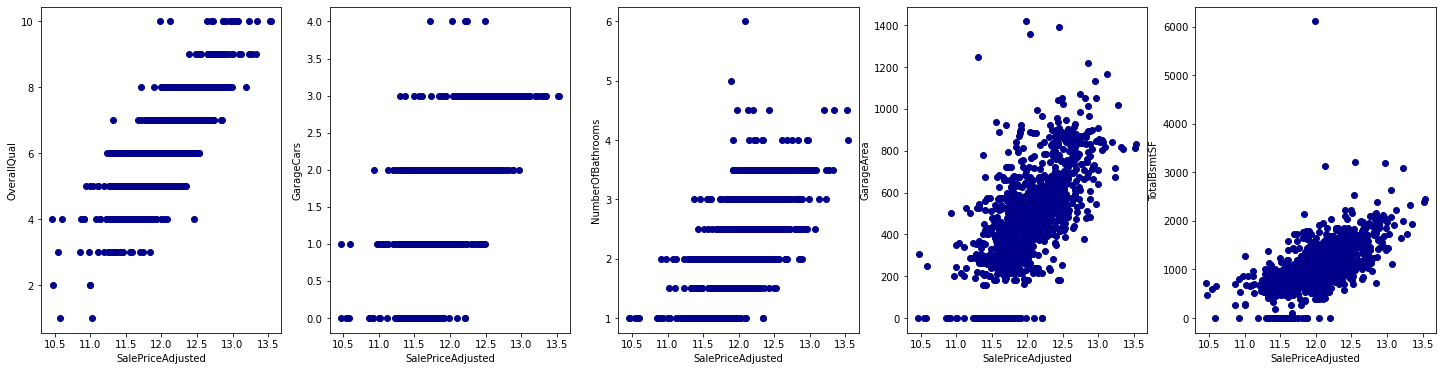

In [36]:
cols = ['OverallQual','GarageCars','NumberOfBathrooms','GarageArea','TotalBsmtSF']
final_df = df[cols]

# Create a figure of a fixed size and axes
f, ax = plt.subplots(1, 5, figsize = (25,6))

# Iterate to draw each scatter plot
for i in range(5):
    plt.sca(ax[i])
    plt.scatter(df['SalePriceAdjusted'],final_df[cols[i]], color = 'darkblue')
    plt.xlabel(df['SalePriceAdjusted'].name)
    plt.ylabel(final_df[cols[i]].name)
    